# Consigna


### **Estructurando un Proyecto de DS (parte II)**


---


Deberemos complementar la parte I con:

1.   Abstracto con motivación y audiencia
2.   Preguntas/Hipótesis que queremos resolver mediante el análisis de datos
3.   Análisis Exploratorio de Datos (EDA)
4.   Con base en las visualizaciones y resúmenes numéricos generados del desafío anterior dar recomendaciones basados en los insights observados.
5.   Para esta oportunidad se deberán tener avances en los apartados: Definición de objetivo, Contexto comercial, Problema Comercial, Contexto analitico, Exploración de datos (EDA)



# Resolucion


### **Datos meteorologicos en Madrid**


---


Este conjunto de datos contiene datos meteorológicos históricos sobre madrid en un pediodo desde 1995 hasta 2015. Los datos incluyen información sobre las precipitaciones diarias, la temperatura y la velocidad del viento. Este conjunto de datos sería útil para cualquier persona interesada en estudiar el clima local o los patrones meteorológicos.

Contexto comercial: Si sabemos que el tiempo será caluroso y húmedo, se pueden tomar medidas para proteger los productos del calor y la humedad. También se pueden tomar decisiones sobre el transporte de productos sensibles al clima, como frutas y verduras.

Problema comercial: Los datos meteorológicos pueden ser imprecisos, especialmente si se trata de pronósticos a largo plazo. También pueden haber errores en los datos recopilados, lo que puede llevar a decisiones comerciales erradas.

El contexto analítico es la predicción del tiempo a partir de datos meteorológicos.

**Objetivo Principal:**

Encontrar la tendencia de los datos para predecir el clima.

**Hipótesis:**

- Los datos meteorológicos pueden proporcionar información valiosa sobre el clima de una región.
- Los datos meteorológicos pueden ser utilizados para predecir el clima futuro.
- Existe una correlación entre la temperatura y la humedad.

**Preguntas:**

- ¿Qué patrones climáticos pueden observarse en los datos meteorológicos?
- ¿Cómo pueden los datos meteorológicos ser utilizados para predecir el clima futuro?
- ¿Cómo se ven afectadas las personas por el clima?
- ¿Cómo se ven afectadas las predicciones del clima por los datos meteorologicos?

## Importacion de las librerias y datos


In [156]:
# Data analysis imports
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [157]:
# Data extraida de kaggle
df_data = pd.read_csv('https://raw.githubusercontent.com/Xukay101/course-data-science/main/datasets/MadridDailyWeather1997-2015.csv')

In [158]:
# Inspeccion rapida de los datos
df_data.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


## Limpieza y procesamiento de los datos

In [159]:
# Renombrado de columnas
df_data.columns

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees'],
      dtype='object')

In [160]:
df_data.columns = [
    'CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
    'Max Dew PointC', 'Mean Dew PointC', 'Min Dew PointC', 
    'Max Humidity', 'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
    'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa', 'Max VisibilityKm',
    'Mean VisibilityKm', 'Min VisibilityKm', 'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h',
    'Max Gust SpeedKm/h', 'PrecipitationMm', 'CloudCover', 'Events', 'WindDirDegrees'
]

In [161]:
# Convercion de las fechas a Datetime
df_data.CET = pd.to_datetime(df_data.CET)
df_data['Month'] = df_data['CET'].dt.month 
df_data['Year'] = df_data['CET'].dt.year
df_data['Day'] = df_data['CET'].dt.day
df_data['DayxYear'] = df_data['CET'].dt.strftime('%m %d')

In [162]:
# Comprobación de tipos de datos, valores únicos y valores perdidos
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CET                         6812 non-null   datetime64[ns]
 1   Max TemperatureC            6810 non-null   float64       
 2   Mean TemperatureC           6809 non-null   float64       
 3   Min TemperatureC            6810 non-null   float64       
 4   Max Dew PointC              6810 non-null   float64       
 5   Mean Dew PointC             6810 non-null   float64       
 6   Min Dew PointC              6810 non-null   float64       
 7   Max Humidity                6810 non-null   float64       
 8   Mean Humidity               6810 non-null   float64       
 9   Min Humidity                6810 non-null   float64       
 10  Max Sea Level PressurehPa   6812 non-null   int64         
 11  Mean Sea Level PressurehPa  6812 non-null   int64       

In [163]:
# Remplazado de valores nulos por la media total de cada columna
df_data['Max TemperatureC'].fillna(df_data['Max TemperatureC'].mean(), inplace= True)
df_data['Mean TemperatureC'].fillna(df_data['Mean TemperatureC'].mean(), inplace= True)
df_data['Min TemperatureC'].fillna(df_data['Min TemperatureC'].mean(), inplace= True)
df_data['Max Dew PointC'].fillna(df_data['Max Dew PointC'].mean(), inplace= True)
df_data['Mean Dew PointC'].fillna(df_data['Mean Dew PointC'].mean(), inplace= True)
df_data['Min Dew PointC'].fillna(df_data['Min TemperatureC'].mean(), inplace= True)
df_data['Max Humidity'].fillna(df_data['Max Humidity'].mean(), inplace= True)
df_data['Mean Humidity'].fillna(df_data['Mean Humidity'].mean(), inplace= True)
df_data['Min Humidity'].fillna(df_data['Min Humidity'].mean(), inplace= True)

df_data.isnull().sum()

CET                              0
Max TemperatureC                 0
Mean TemperatureC                0
Min TemperatureC                 0
Max Dew PointC                   0
Mean Dew PointC                  0
Min Dew PointC                   0
Max Humidity                     0
Mean Humidity                    0
Min Humidity                     0
Max Sea Level PressurehPa        0
Mean Sea Level PressurehPa       0
Min Sea Level PressurehPa        0
Max VisibilityKm               940
Mean VisibilityKm              940
Min VisibilityKm               940
Max Wind SpeedKm/h               0
Mean Wind SpeedKm/h              0
Max Gust SpeedKm/h            3306
PrecipitationMm                  0
CloudCover                    1372
Events                        5014
WindDirDegrees                   0
Month                            0
Year                             0
Day                              0
DayxYear                         0
dtype: int64

## Exploración de datos (EDA)

In [164]:
df_data.describe()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Max Dew PointC,Mean Dew PointC,Min Dew PointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Min VisibilityKm,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,PrecipitationMm,CloudCover,WindDirDegrees,Month,Year,Day
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,...,5872.000000,6812.000000,6812.000000,3506.000000,6812.000000,5440.000000,6812.000000,6812.000000,6812.000000,6812.000000
mean,21.039648,14.658687,8.640529,8.120705,4.976211,1.453359,81.139354,57.971366,34.729369,1020.529360,...,9.134877,21.953171,9.170728,43.988306,0.111182,3.206066,197.234586,6.576923,2006.094245,15.717704
std,8.865885,7.578792,6.836622,4.740371,4.653587,4.910529,17.529264,19.672854,19.317522,6.235941,...,5.075065,9.903914,5.110013,12.252462,0.967174,1.808948,119.872777,3.444735,5.478934,8.795613
min,0.000000,-3.000000,-10.000000,-12.000000,-15.000000,-22.000000,16.000000,15.000000,4.000000,994.000000,...,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,-1.000000,1.000000,1997.000000,1.000000
25%,13.000000,8.000000,3.000000,5.000000,2.000000,-2.000000,68.000000,41.000000,19.000000,1017.000000,...,7.000000,14.000000,6.000000,35.000000,0.000000,2.000000,66.000000,4.000000,2001.000000,8.000000
50%,20.000000,14.000000,9.000000,8.000000,6.000000,2.000000,87.000000,59.000000,32.000000,1020.000000,...,10.000000,21.000000,8.000000,42.000000,0.000000,3.000000,223.000000,7.000000,2006.000000,16.000000
75%,29.000000,21.000000,14.000000,12.000000,8.000000,5.000000,94.000000,74.000000,47.250000,1024.000000,...,10.000000,27.000000,11.000000,52.000000,0.000000,5.000000,299.000000,10.000000,2011.000000,23.000000
max,41.000000,32.000000,28.000000,20.000000,16.000000,14.000000,100.000000,100.000000,100.000000,1047.000000,...,31.000000,182.000000,39.000000,103.000000,32.000000,8.000000,360.000000,12.000000,2015.000000,31.000000


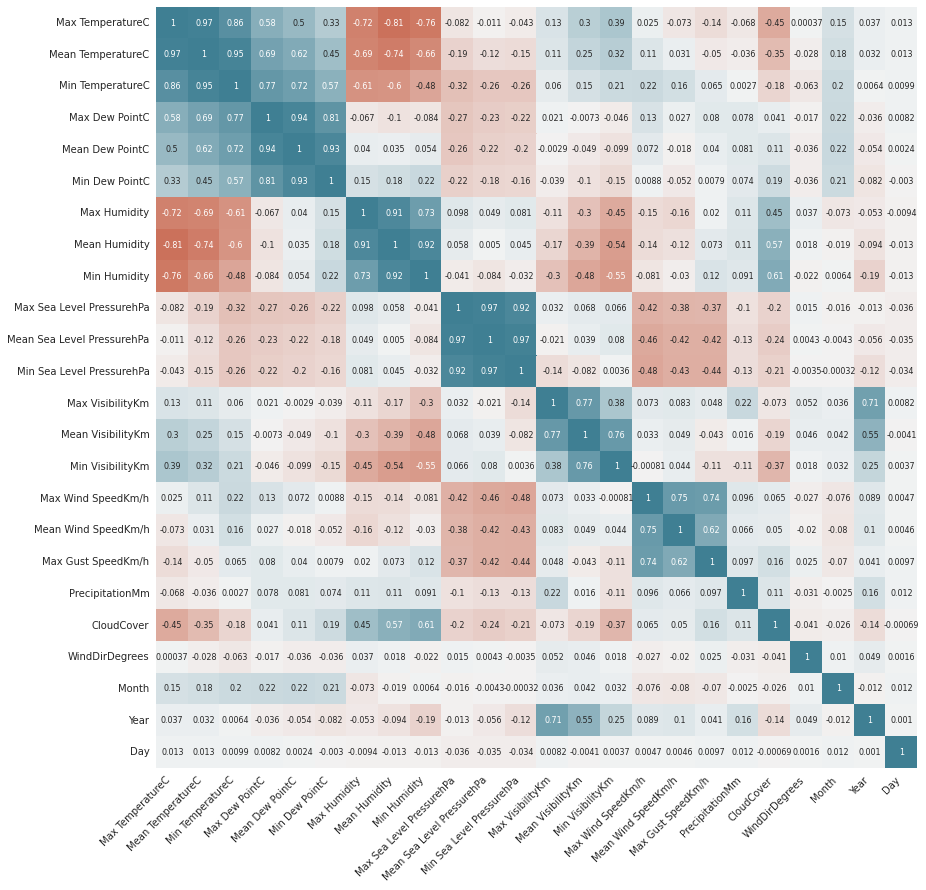

In [165]:
# Uso de un mapa de correlación (heatmap) para ver las correlaciones entre las columnas
fig, ax = plt.subplots(figsize=(20, 14))

sns.heatmap(
    df_data.corr(), annot = True, 
    cbar = False, annot_kws = {"size": 8}, 
    vmin = -1, vmax = 1, center = 0, 
    cmap = sns.diverging_palette(20, 220, n=200), 
    square = True, ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

plt.show()

-   La temperatura y la humedad están altamente correlacionadas.
-   La presión y la temperatura también están altamente correlacionadas.
-   La velocidad del viento y la dirección del viento están altamente correlacionadas.

In [166]:
df_data.nunique()

CET                           6812
Max TemperatureC                43
Mean TemperatureC               37
Min TemperatureC                40
Max Dew PointC                  33
Mean Dew PointC                 33
Min Dew PointC                  38
Max Humidity                    67
Mean Humidity                   87
Min Humidity                    87
Max Sea Level PressurehPa       51
Mean Sea Level PressurehPa      54
Min Sea Level PressurehPa       57
Max VisibilityKm                21
Mean VisibilityKm               32
Min VisibilityKm                24
Max Wind SpeedKm/h              40
Mean Wind SpeedKm/h             24
Max Gust SpeedKm/h              42
PrecipitationMm                 21
CloudCover                       9
Events                          15
WindDirDegrees                 361
Month                           12
Year                            19
Day                             31
DayxYear                       366
dtype: int64

In [167]:

df_events = df_data["Events"].value_counts().reset_index()
df_events.columns = ["Event Type", "count"]
df_events

,Event Type,count
0,Rain,1140
1,Rain-Thunderstorm,247
2,Fog,233
3,Fog-Rain,69
4,Thunderstorm,45
5,Rain-Snow,33
6,Snow,14
7,Rain-Hail-Thunderstorm,7
8,Fog-Snow,4
9,Fog-Thunderstorm,1


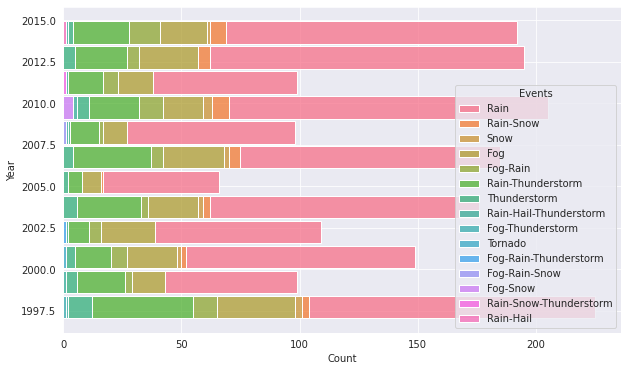

In [168]:
# Histplot con cada año y los eventos ocurridos en el mismo

plt.figure(figsize=(10,6))
sns.histplot(df_data, y='Year', hue="Events", multiple="stack", shrink=0.9)

In [169]:
df_cloudcover = df_data["CloudCover"].value_counts().reset_index()
df_cloudcover.columns = ["Event Type", "count"]
df_cloudcover

,Event Type,count
0,1.0,1232
1,4.0,891
2,2.0,873
3,3.0,870
4,5.0,807
5,6.0,556
6,7.0,90
7,0.0,85
8,8.0,36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


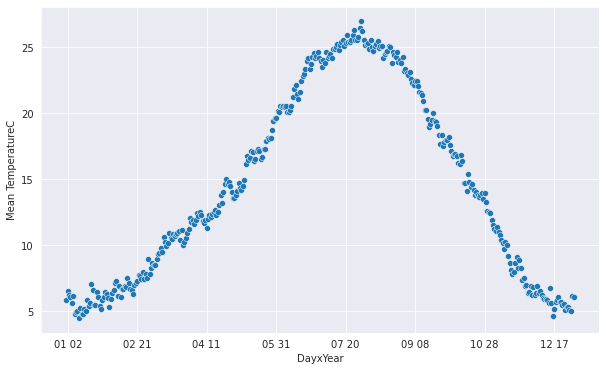

In [170]:
# Media de la temperara por dia
df_dataxday = df_data.groupby(['DayxYear'])['DayxYear', 'Mean TemperatureC'].mean()

plt.figure(figsize=(10,6))
sns.scatterplot(x='DayxYear', y='Mean TemperatureC', data=df_dataxday)
plt.xticks(range(1, 365, 50))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


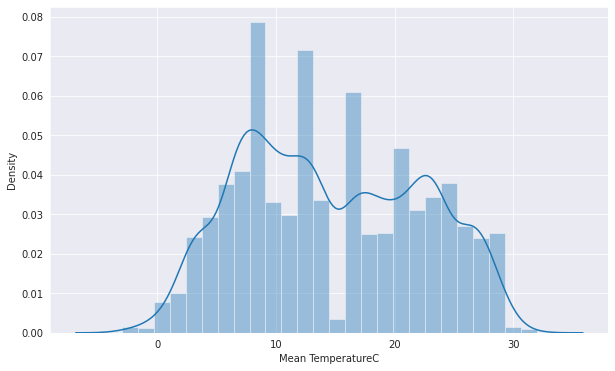

In [171]:
# Distribucion de los valores en la temperatura
plt.figure(figsize=(10,6))
sns.distplot(df_data['Mean TemperatureC'])

En estos graficos se puede apreciar que entre los 15°C y 17°C no se aprecia un alto volumen de datos.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


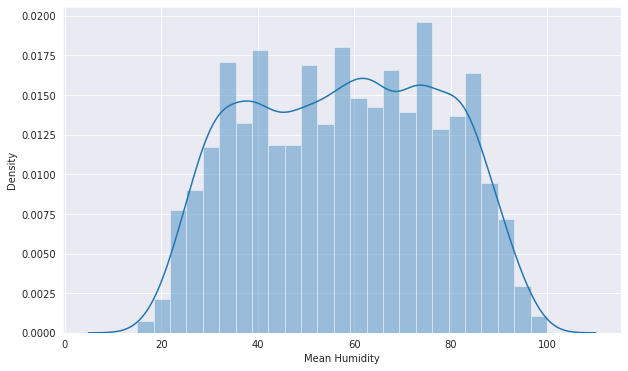

In [172]:
# Distribucion de los valores en la humedad media
plt.figure(figsize=(10,6))
sns.distplot(df_data['Mean Humidity'])

Correlación: -0.74


Text(0.5, 1.0, 'Mean Humidity vs Mean Temperature')

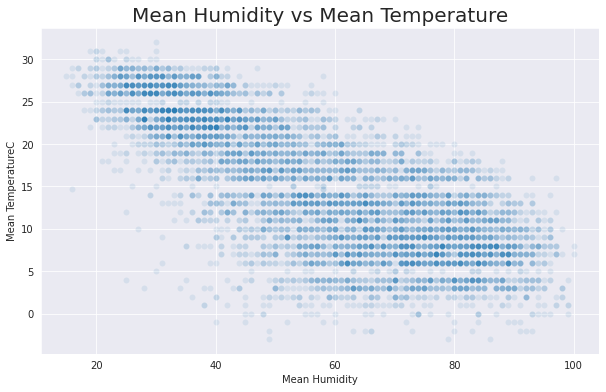

In [173]:
# Correlación entre la temperatura y la humedad
plt.figure(figsize=(10,6))
print(f'Correlación: {round(df_data["Mean Humidity"].corr(df_data["Mean TemperatureC"]), 2)}')
sns.scatterplot(
    data=df_data[['Mean Humidity', 'Mean TemperatureC']], 
    x='Mean Humidity', 
    y='Mean TemperatureC',
    alpha=0.1
).set_title('Mean Humidity vs Mean Temperature', fontsize=20)

A simple vista, se puede ver que cuando la temperatura es más alta, la humedad es más baja.

Correlación: 0.62


Text(0.5, 1.0, 'Mean Dew Point vs Mean Temperature')

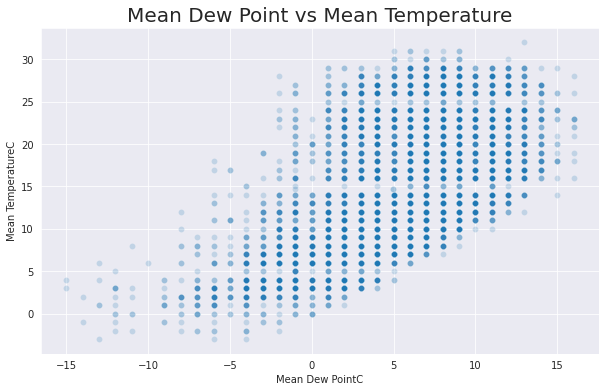

In [174]:
# Correlación entre la temperatura y el punto de rocio
plt.figure(figsize=(10,6))
print(f'Correlación: {round(df_data["Mean Dew PointC"].corr(df_data["Mean TemperatureC"]), 2)}')
sns.scatterplot(
    data=df_data[['Mean Dew PointC', 'Mean TemperatureC']], 
    x='Mean Dew PointC', 
    y='Mean TemperatureC',
    alpha=0.2
).set_title('Mean Dew Point vs Mean Temperature', fontsize=20)

A medida que la temperatura aumenta, el punto de rocío también aumenta.

Correlación: 0.03


Text(0.5, 1.0, 'Mean Wind Speed vs Mean Temperature')

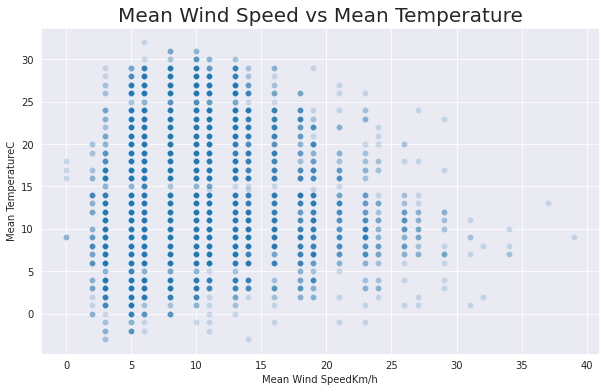

In [175]:
# Correlación entre la temperatura y la velocidad del viento
plt.figure(figsize=(10,6))
print(f'Correlación: {round(df_data["Mean Wind SpeedKm/h"].corr(df_data["Mean TemperatureC"]), 2)}')
sns.scatterplot(
    data=df_data[['Mean Wind SpeedKm/h', 'Mean TemperatureC']], 
    x='Mean Wind SpeedKm/h', 
    y='Mean TemperatureC',
    alpha=0.2
).set_title('Mean Wind Speed vs Mean Temperature', fontsize=20)


A simple vista, parece que no hay una relación clara entre la temperatura y la velocidad del viento.

Correlación: -0.39


Text(0.5, 1.0, 'Mean Visibility vs Mean Humidity')

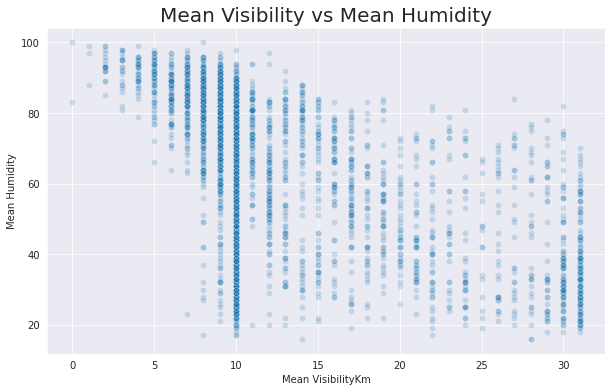

In [176]:
# Correlación entre humedad y la visibilidad
plt.figure(figsize=(10,6))
print(f'Correlación: {round(df_data["Mean VisibilityKm"].corr(df_data["Mean Humidity"]), 2)}')
sns.scatterplot(
    data=df_data[['Mean VisibilityKm', 'Mean Humidity']], 
    x='Mean VisibilityKm', 
    y='Mean Humidity',
    alpha=0.2
).set_title('Mean Visibility vs Mean Humidity', fontsize=20)

Parece que existe una relación inversa baja entre la visibilidad y la humedad. A medida que la humedad aumenta, la visibilidad disminuye.

In [177]:
df_data.columns

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Max Dew PointC', 'Mean Dew PointC', 'Min Dew PointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilityKm',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'PrecipitationMm', 'CloudCover', 'Events', 'WindDirDegrees', 'Month',
       'Year', 'Day', 'DayxYear'],
      dtype='object')

In [178]:
# Desviación estándar de la velocidad máxima del viento todos los días
round(df_data["Max Wind SpeedKm/h"].std(), 2)

9.9

Media: 9.17


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


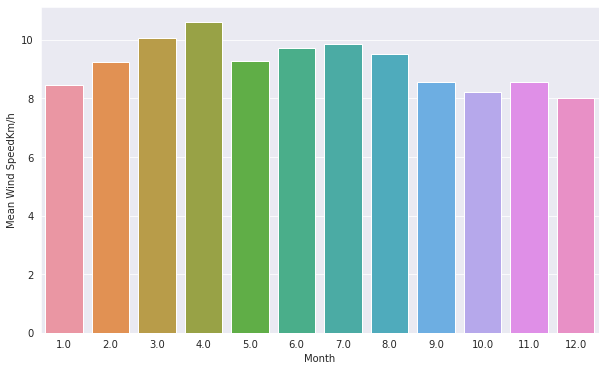

In [179]:
# Media de velocidad del viento por dia
df_dataxmonth = df_data.groupby(['Month'])['Month', 'Mean Wind SpeedKm/h'].mean()
print(f'Media: {round(df_data["Mean Wind SpeedKm/h"].mean(), 2)}')

plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='Mean Wind SpeedKm/h', data=df_dataxmonth)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


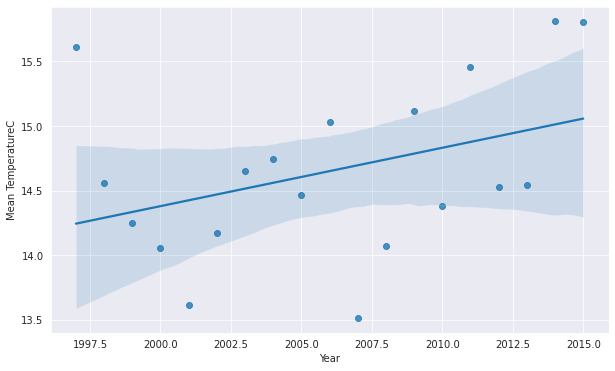

In [180]:
# Regresion linear sobre la temperatura media a lo largo de los anios
df_dataxyear = df_data.groupby(['Year'])['Year', 'Mean TemperatureC'].mean()

plt.figure(figsize=(10,6))
sns.regplot(x='Year', y='Mean TemperatureC', data=df_dataxyear)

En esta regresión linear se puede observar una tendencia alcista de la temperatura media a lo largo de los 19 anios.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


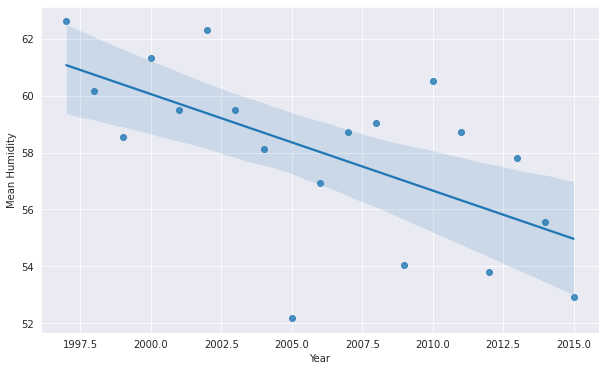

In [181]:
# Regresion linear sobre la humedad media a lo largo de los anios
df_dataxyear = df_data.groupby(['Year'])['Year', 'Mean Humidity'].mean()

plt.figure(figsize=(10,6))
sns.regplot(x='Year', y='Mean Humidity', data=df_dataxyear)

La regresión linear muestra una tendencia bajista de la humedad media a lo largo de los 19 anios.

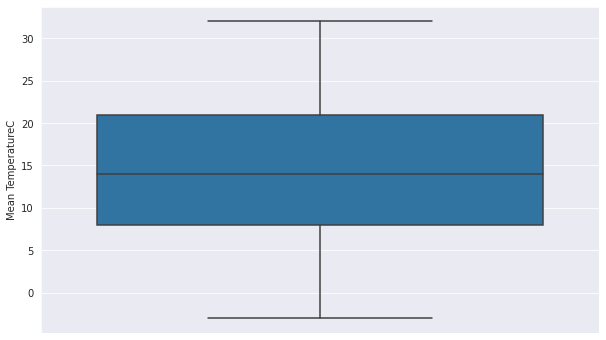

In [182]:
# Grafico boxplot sobre la temperatura media
plt.figure(figsize=(10,6))
sns.boxplot(y=df_data['Mean TemperatureC'])

In [183]:
f'Media: {df_data["Mean TemperatureC"].mean()}'

'Media: 14.658687031869583'

In [184]:
# Comparacion distribucion de temperatura maxima con temperatura minima

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


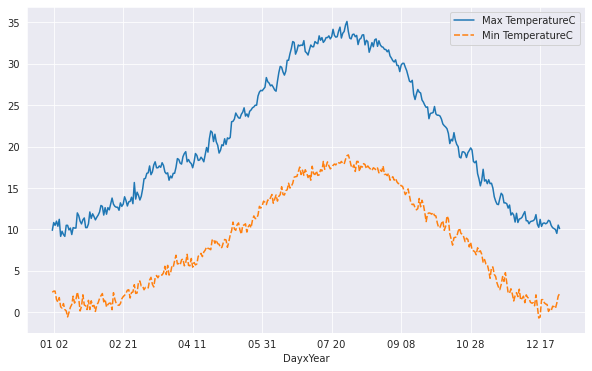

In [185]:
# Media de la temperara por dia
df_dataxday = df_data.groupby(['DayxYear'])['DayxYear', 'Max TemperatureC', 'Min TemperatureC'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(data=df_dataxday)
plt.xticks(range(1, 365, 50))
plt.show()

Se puede apreciar un pequeño cambio en el aumento de la temperatura maxima contra el aumento de la temperatura minima.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


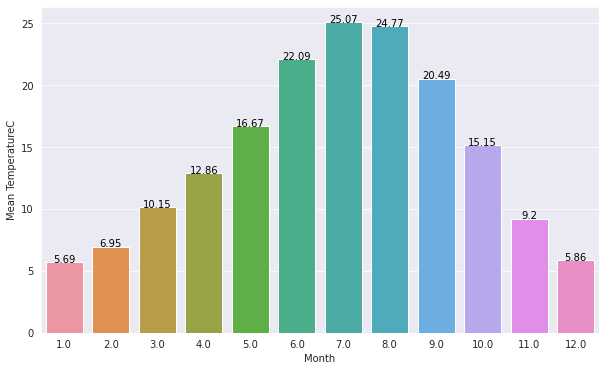

In [192]:
# Media de temperatura por mes
df_dataxmonth = df_data.groupby(['Month'])['Month', 'Mean TemperatureC'].mean()

plt.figure(figsize=(10,6))
graph = sns.barplot(data=df_dataxmonth, x='Month', y='Mean TemperatureC')
for index, row in df_dataxmonth.iterrows():
  graph.text(row['Month'] - 1, row['Mean TemperatureC'], round(row['Mean TemperatureC'], 2), color='black', ha='center')
plt.show()

Se puede observar que la temperatura máxima parece aumentar más rápido que la temperatura mínima.

In [187]:
print(f'Temperatura mas baja: {df_data["Min TemperatureC"].min()}')
print(f'Temperatura mas alta: {df_data["Max TemperatureC"].max()}')

Temperatura mas baja: -10.0
Temperatura mas alta: 41.0


Media: 189.34249999999997


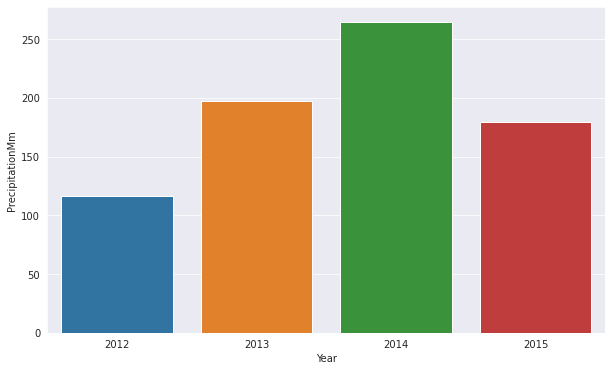

In [188]:
# Media de precitaciones por anio
df_rain = df_data[df_data['Year'] >= 2012].reset_index()
df_rainxyear =  pd.DataFrame(df_rain.groupby(['Year'])['PrecipitationMm'].sum())
df_rainxyear


print(f'Media: {df_rainxyear["PrecipitationMm"].mean()}')
plt.figure(figsize=(10,6))
sns.barplot(x=df_rainxyear.index, y='PrecipitationMm', data=df_rainxyear)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


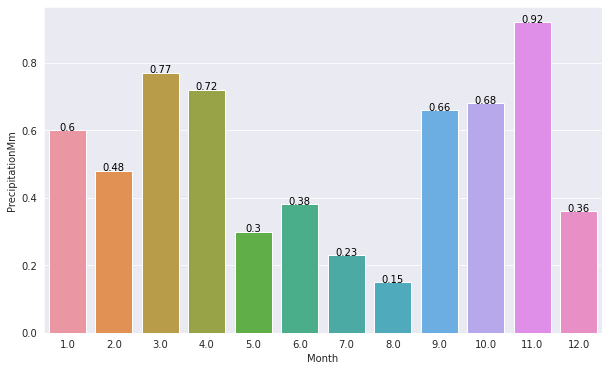

In [189]:
# Media de precipitaciones por meses
df_rainxmonth = df_rain.groupby(['Month'])['Month', 'PrecipitationMm'].mean()
df_rainxmonth['PrecipitationMm'] = round(df_rainxmonth['PrecipitationMm'], 2)

plt.figure(figsize=(10,6))
graph = sns.barplot(data=df_rainxmonth, x='Month', y='PrecipitationMm')
for index, row in df_rainxmonth.iterrows():
  graph.text(row['Month'] - 1, row['PrecipitationMm'], row['PrecipitationMm'], color='black', ha='center')
plt.show()

In [190]:
# Media de cantidad de dias que llueve por anio
df_rain['it rained'] = [1 if e > 0 else 0 for e in df_rain['PrecipitationMm']]
df_rainxyear = df_rain.groupby(['Year'])['it rained'].sum()

df_rainxyear.mean()

61.25

### Insights

- Hay una gran variedad en los datos meteorológicos, lo que indica que el clima en el área es muy cambiante.
- La temperatura media es de unos 10-20 °C, pero hay muchos días en los que la temperatura es muy baja o muy alta.
- Los datos parecen indicar una tendencia general hacia el aumento de la temperatura a lo largo de los años.
- La temperatura máxima parece aumentar más rápido que la temperatura mínima.
- Los datos parecen estar completos en su mayor parte, con muchos datos perdidos en la columna de precipitaciones.
- Los meses más calurosos son julio y agosto, con una temperatura media de unos 27 grados centígrados. 
- Los meses más fríos son enero y diciembre, con una temperatura media de unos 5 grados centígrados. 
- La velocidad media del viento en Madrid es de unos 9.7 kilómetros por hora.
- Madrid experimenta una media de 60 días de precipitaciones al año.
- La media de precipitaciones por año es de 189.0 Mm

## Recomendaciones

- Compruebe regularmente la previsión meteorológica para planificar las actividades en consecuencia.

- En invierno, Madrid puede ser bastante fría y ventosa, así que asegúrese de llevar ropa de abrigo. La nieve es relativamente rara en Madrid, pero ocurre ocasionalmente.

- Madrid puede ser bastante calurosa y húmeda en verano, es recomendable meter en la maleta ropa adecuada y protección solar.

- Es recomendable llevar un paraguas cuando se viaja a Madrid, ya que hay una alta probabilidad de lluvia.

